<a href="https://colab.research.google.com/github/weningalfinaa/Breast-Cancer-Dataset/blob/main/Breast%20Cancer%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

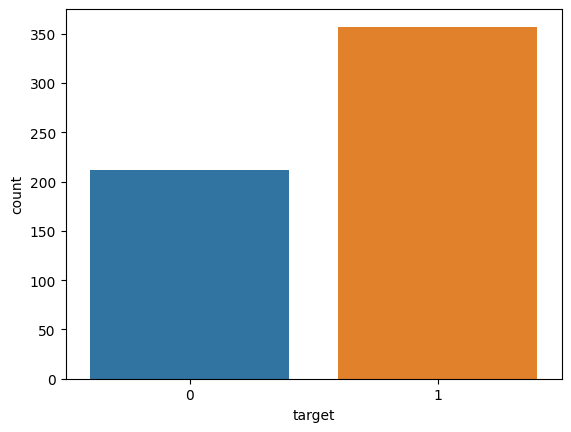

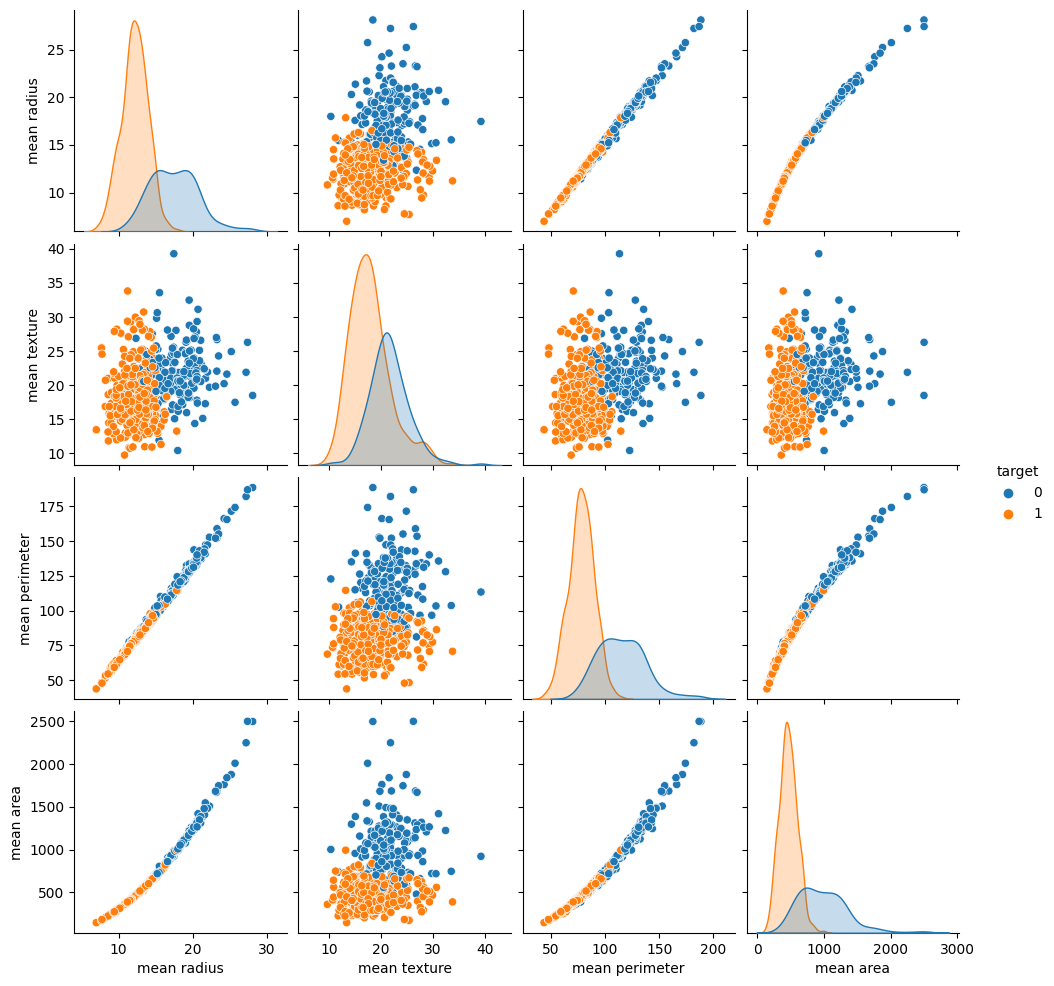

Decision Tree Accuracy: 0.9473684210526315
Decision Tree Confusion Matrix:
 [[40  3]
 [ 3 68]]
Random Forest Accuracy: 0.9649122807017544
Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]


/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Self-Training Accuracy: 0.9649122807017544
Self-Training Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.head())
sns.countplot(x='target', data=df)
plt.show()
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))

# Self-Training
st = SelfTrainingClassifier(RandomForestClassifier(random_state=42), verbose=2)
st.fit(X_train, y_train)
y_pred_st = st.predict(X_test)
print('Self-Training Accuracy:', accuracy_score(y_test, y_pred_st))
print('Self-Training Confusion Matrix:\n', confusion_matrix(y_test, y_pred_st))
